In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit

# Find PWM for known angles

In [10]:
# Convert desired degrees to PWM based on datasheet formula
def deg2PWM(desire_deg_angles):
    output = []
    for angle in desire_deg_angles:
        pulse = round((7.4074 * angle) + 500, 0)
        output.append(pulse)
        print(f"// {angle} degrees => {pulse} PWM")
    return output

# Desired angles and corresponding PWM (based on formula)
desire_angles = [0, 45, 90, 135, 180]
desired_PWM = deg2PWM(desire_angles)
print("\nDesired PWM values:", desired_PWM)

// 0 degrees => 500.0 PWM
// 45 degrees => 833.0 PWM
// 90 degrees => 1167.0 PWM
// 135 degrees => 1500.0 PWM
// 180 degrees => 1833.0 PWM

Desired PWM values: [500.0, 833.0, 1167.0, 1500.0, 1833.0]


# Find real PWM for known angles

In [11]:
real_pwm_SFR = np.array([620,940,1280,1620,1940])
real_pwm_FFR = np.array([580,920,1260,1610,1935])
real_pwm_TFR = np.array([620,950,1278,1630,1960])

In [12]:
real_pwm_SFL = np.array([640,980,1320,1670,1999])
real_pwm_FFL = np.array([630,960,1310,1670,2000])
real_pwm_TFL = np.array([550,880,1205,1555,1890])

In [13]:
real_pwm_SBR = np.array([630,960,1300,1660,1985])
real_pwm_FBR = np.array([550,883,1217,1580,1920])
real_pwm_TBR = np.array([560,883,1210,1555,1890])

In [14]:
real_pwm_SBL = np.array([650,990,1320,1660,1970])
real_pwm_FBL = np.array([630,970,1315,1660,1990])
real_pwm_TBL = np.array([640,970,1320,1670,1980])

# Least Square Regression








[ 620  940 1280 1620 1940], 0-------------

Quadratic equation coefficients: a = -9.051488300401799e-18, b = 7.377777777777785, c = 616.0000000000003


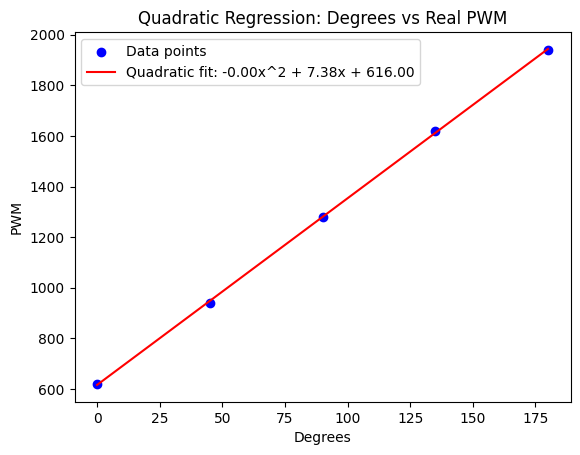








[ 580  920 1260 1610 1935], 1-------------

Quadratic equation coefficients: a = -0.000705467372134048, b = 7.6825396825396846, c = 578.1428571428575


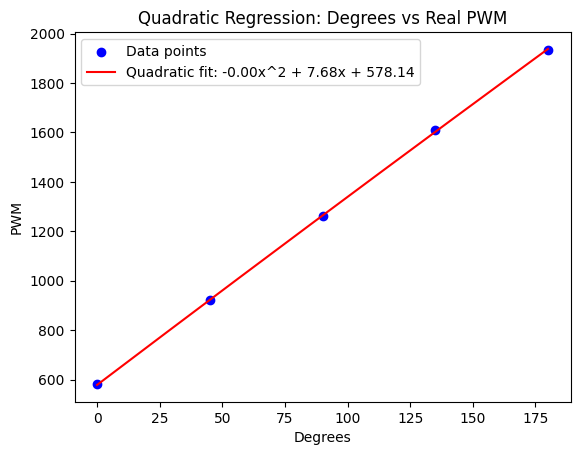








[ 620  950 1278 1630 1960], 2-------------

Quadratic equation coefficients: a = 0.0008465608465609083, b = 7.314285714285705, c = 619.028571428572


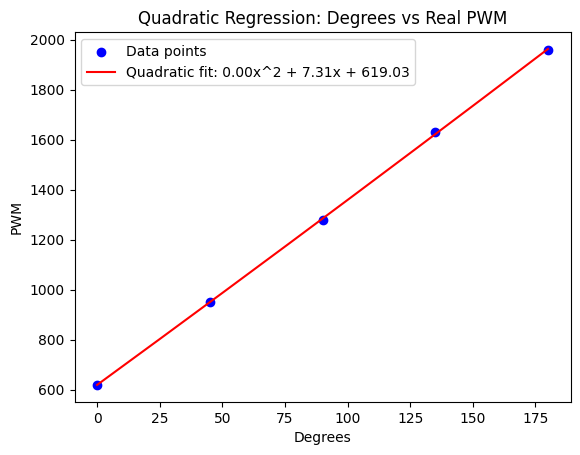








[ 640  980 1320 1670 1999], 3-------------

Quadratic equation coefficients: a = -0.0004232804232804472, b = 7.649523809523815, c = 638.4857142857148


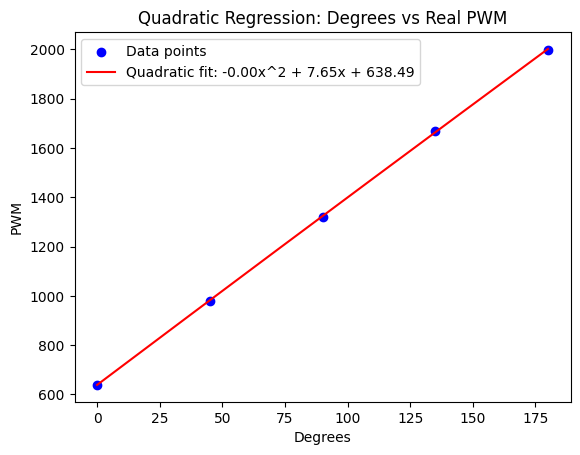








[ 630  960 1310 1670 2000], 4-------------

Quadratic equation coefficients: a = 0.00035273368606701254, b = 7.603174603174607, c = 625.428571428572


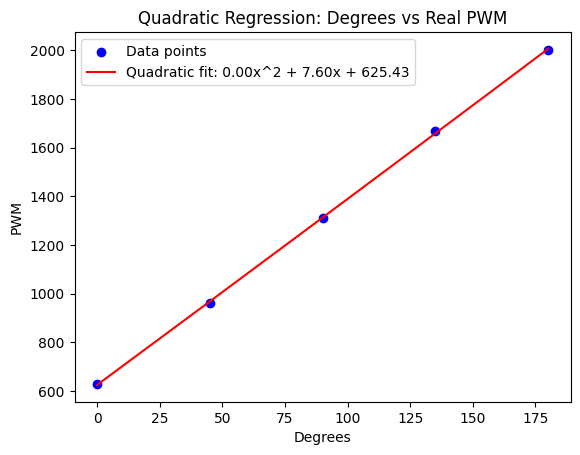








[ 550  880 1205 1555 1890], 5-------------

Quadratic equation coefficients: a = 0.0012345679012346097, b = 7.233333333333331, c = 550.0000000000002


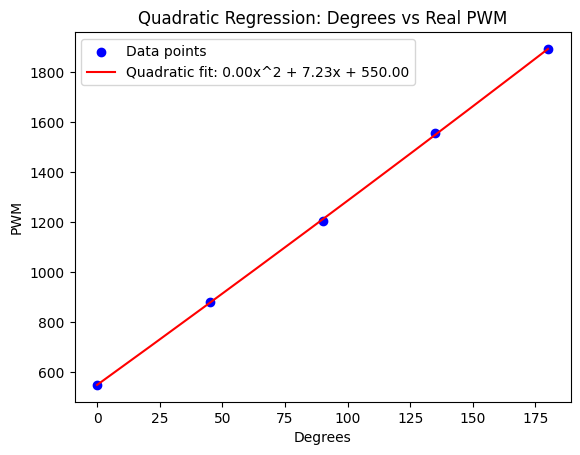








[ 630  960 1300 1660 1985], 6-------------

Quadratic equation coefficients: a = 0.00035273368606700343, b = 7.5142857142857205, c = 626.4285714285721


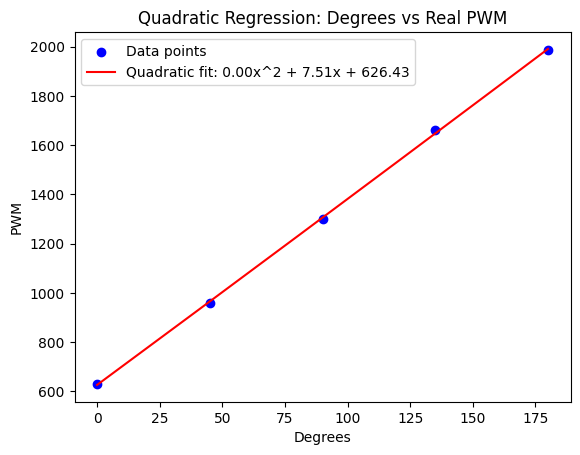








[ 550  883 1217 1580 1920], 7-------------

Quadratic equation coefficients: a = 0.0015167548500881506, b = 7.364761904761912, c = 548.7428571428574


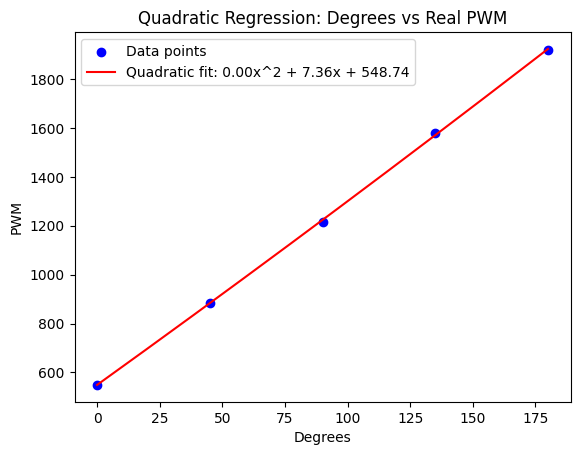








[ 560  883 1210 1555 1890], 8-------------

Quadratic equation coefficients: a = 0.0014814814814814881, b = 7.1377777777777744, c = 559.2000000000004


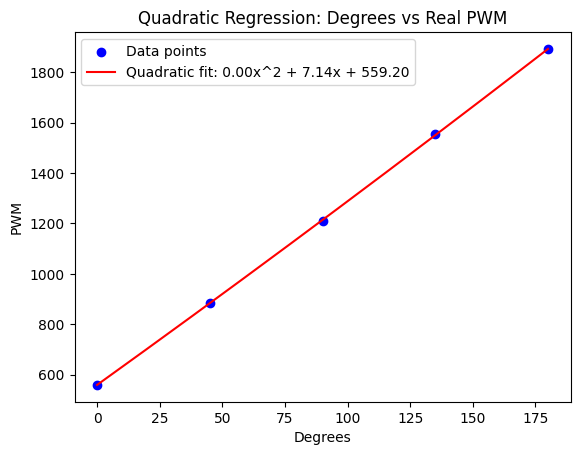








[ 650  990 1320 1660 1970], 9-------------

Quadratic equation coefficients: a = -0.0017636684303351205, b = 7.673015873015878, c = 648.8571428571432


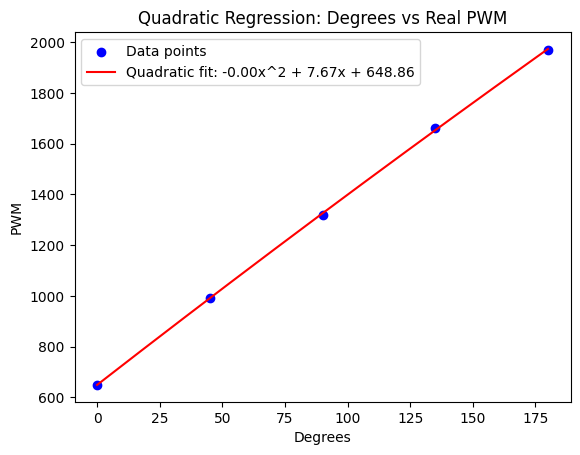








[ 630  970 1315 1660 1990], 10-------------

Quadratic equation coefficients: a = -0.000705467372134002, b = 7.704761904761896, c = 628.1428571428578


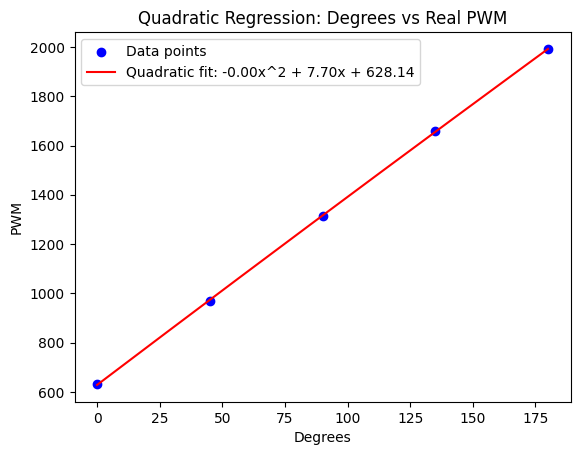








[ 640  970 1320 1670 1980], 11-------------

Quadratic equation coefficients: a = -0.0014109347442681048, b = 7.76507936507937, c = 634.285714285715


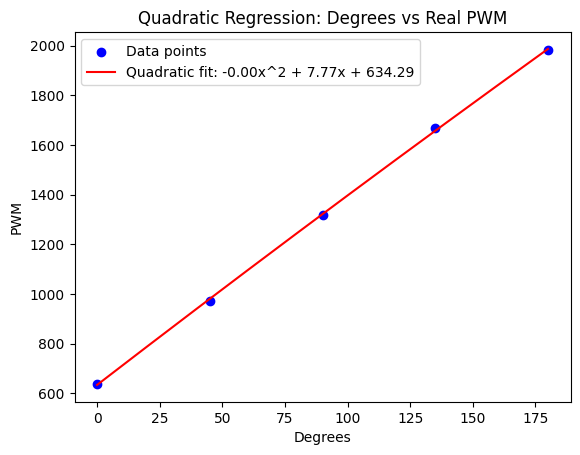

In [15]:
alll = [
  real_pwm_SFR,
  real_pwm_FFR,
  real_pwm_TFR,
  real_pwm_SFL,
  real_pwm_FFL,
  real_pwm_TFL,
  real_pwm_SBR,
  real_pwm_FBR,
  real_pwm_TBR,
  real_pwm_SBL,
  real_pwm_FBL,
  real_pwm_TBL
]
for i in range(len(alll)):
  real_pwm = alll[i]
  print(f"\n\n\n\n\n\n\n{alll[i]}, {i}-------------\n")
  # Data: Degrees and corresponding real PWM values
  degrees = np.array([0, 45, 90, 135, 180])  # x values (degree)

  # Perform quadratic regression (degree 2 polynomial)
  coefficients = np.polyfit(degrees, real_pwm, 2)

  # Coefficients: a, b, c (for ax^2 + bx + c)
  a, b, c = coefficients

  # Output the coefficients
  print(f"Quadratic equation coefficients: a = {a}, b = {b}, c = {c}")

  # Optional: Plotting the fit
  plt.scatter(degrees, real_pwm, color='blue', label='Data points')
  x_vals = np.linspace(0, 180, 1000)
  y_vals = a * x_vals**2 + b * x_vals + c
  plt.plot(x_vals, y_vals, color='red', label=f'Quadratic fit: {a:.2f}x^2 + {b:.2f}x + {c:.2f}')
  plt.xlabel('Degrees')
  plt.ylabel('PWM')
  plt.title('Quadratic Regression: Degrees vs Real PWM')
  plt.legend()
  plt.show()

# Save coefficents

In [ ]:
a_SFR = 0
b_SFR = 7.378
c_SFR = 616.0
coefficents_SFR = np.array([a_SFR, b_SFR, c_SFR])

a_FFR = 0
b_FFR = 7.682
c_FFR = 578.142
coefficents_FFR = np.array([a_FFR, b_FFR, c_FFR])

a_TFR = 0
b_TFR = 7.314
c_TFR = 619.028
coefficents_TFR = np.array([a_TFR, b_TFR, c_TFR])

#------------------------

a_SFL = 0
b_SFL = 7.649
c_SFL = 638.486
coefficents_SFL = np.array([a_SFL, b_SFL, c_SFL])

a_FFL = 0
b_FFL = 7.603
c_FFL = 625.428
coefficents_FFL = np.array([a_FFL, b_FFL, c_FFL])

a_TFL = 0.001
b_TFL = 7.234
c_TFL = 550.0
coefficents_TFL = np.array([a_TFL, b_TFL, c_TFL])

#------------------------

a_SBR = 0
b_SBR = 7.514
c_SBR = 626.428
coefficents_SBR = np.array([a_SBR, b_SBR, c_SBR])

a_FBR = 0.001
b_FBR = 7.364
c_FBR = 548.742
coefficents_FBR = np.array([a_FBR, b_FBR, c_FBR])

a_TBR = 0.001
b_TBR = 7.137
c_TBR = 559.2
coefficents_TBR = np.array([a_TBR, b_TBR, c_TBR])

#------------------------

a_SBL = 0.001
b_SBL = 7.673
c_SBL = 648.857
coefficents_SBL = np.array([a_SBL, b_SBL, c_SBL])

a_FBL = 0
b_FBL = 7.704
c_FBL = 628.142
coefficents_FBL = np.array([a_FBL, b_FBL, c_FBL])

a_TBL = -0.001
b_TBL = 7.765
c_TBL = 634.285
coefficents_TBL = np.array([a_TBL, b_TBL, c_TBL])

# Test

In [ ]:
def deg2PWM(desire_deg_angle, coefficents):
    a, b, c = coefficents
    pulse = round((a * desire_deg_angle**2) + (b * desire_deg_angle) + c, 0)
    return pulse

In [ ]:
desire_angles = np.array([90, 90, 0])
desire_PWM_SFR = deg2PWM(desire_angles[0], coefficents_SBL)
desire_PWM_FFR = deg2PWM(desire_angles[1], coefficents_FBL)
desire_PWM_TFR = deg2PWM(desire_angles[2], coefficents_TBL)

print(f"shoulder_angle_FR.writeMicroseconds({desire_PWM_SFR});\n  femur_angle_FR.writeMicroseconds({desire_PWM_FFR});\n  tibia_angle_FR.writeMicroseconds({desire_PWM_TFR}); ")

shoulder_angle_FR.writeMicroseconds(1279.0);
  femur_angle_FR.writeMicroseconds(1322.0);
  tibia_angle_FR.writeMicroseconds(634.0); 
